# EDA

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/taxi_trip_pricing.csv")

In [159]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


base_fare = grundpris

In [160]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [161]:
df.describe().T.drop(columns="count")

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


- Per_Km_Rate = pris per körd kilometer.
- Per_Minute_Rate = pris per minut under resan eller väntetid.

Som label så kommer jag att använda 'Trip_Price'

Kolumner som känns rimliga för features är:
- Time_of_Day
- Day_of_Week
- Passenger_Count
- Traffic_Conditions
- Trip_Distance_km

dem andra kolumnerna kommer man inte veta om för ens taxi resan är över.
Det kan bli 'target leakage' om dessa är med:
- Trip_Duration_Minutes - inte tillgängligt innan resan, så det blir olämpligt som input-feature

Dessa läcker prislogiken och riskerar 'target leakage':
- Base_Fare
- Per_Km_Rate
- Per_Minute_Rate

Text(0.5, 1.0, 'Trip duration vs trip price')

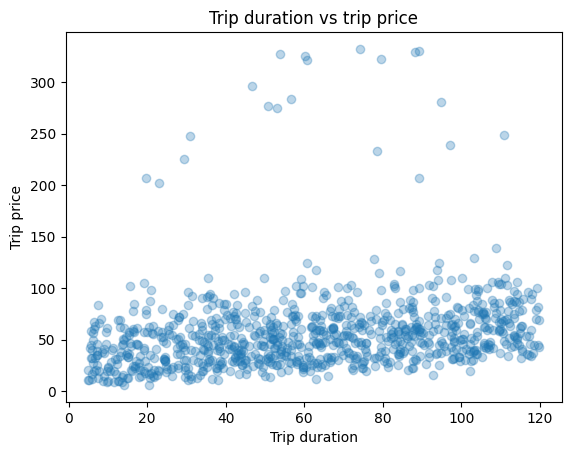

In [162]:
plt.scatter(df["Trip_Duration_Minutes"], df["Trip_Price"], alpha=0.3)
plt.xlabel("Trip duration")
plt.ylabel("Trip price")
plt.title("Trip duration vs trip price")

Resans tid i längd har ett positivt samband med priset, men spridningen är stor och relationen är inte linjär. Spridningen ensam räcker inte för att förklara priset, mer komplexa modeller behövs för att fånga prissättningen.

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [164]:
df[df["Trip_Price"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
45,920,43.55,Afternoon,Weekday,2.0,Low,NaN,4.97,0.79,0.33,111.30,NaN
44,910,29.92,Afternoon,Weekday,1.0,Low,Clear,2.14,1.14,0.28,23.10,NaN
18,274,26.06,Afternoon,Weekend,4.0,Medium,Clear,2.08,1.14,0.23,113.99,NaN
2,11,48.53,Night,Weekday,3.0,Low,Clear,4.78,NaN,0.50,79.94,NaN
11,212,32.95,Morning,Weekday,1.0,Medium,Clear,3.36,1.56,0.19,81.37,NaN
47,976,30.16,Morning,Weekend,4.0,Medium,Clear,3.55,1.50,0.13,117.57,NaN
29,632,26.07,Afternoon,Weekday,1.0,Medium,Clear,3.62,1.51,0.49,64.89,NaN
25,449,5.09,Afternoon,Weekday,4.0,Low,NaN,4.48,0.53,0.21,71.35,NaN
4,94,38.78,Morning,Weekday,3.0,Medium,Clear,3.08,1.62,0.15,90.14,NaN
12,214,35.90,NaN,Weekend,2.0,High,Clear,4.03,1.79,0.13,107.25,NaN


In [165]:
df["Per_Km_Rate"].sort_values().unique()

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71,
       1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82,
       1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93,
       1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.  ,  n

# Trip_Price (label)
- 49 nulls
- finns inga extrema outliers
- trip_price är höger snedfördelat, vilket är rimligt då det förekommer färre längre resor än korta

In [166]:
df["Trip_Price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Trip_Price
Non-Null Count  Dtype  
--------------  -----  
951 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [167]:
df["Trip_Price"].isna().sum()
df["Trip_Price"].describe()
df["Trip_Price"].isna().mean() * 100

np.float64(4.9)

In [168]:
df["Trip_Price"].sort_values().unique()

array([  6.1269    ,   6.4729    ,   8.6709    ,   8.7296    ,
         8.9203    ,   9.8005    ,   9.8718    ,   9.9494    ,
        10.2366    ,  10.4444    ,  11.2613    ,  11.2645    ,
        11.3358    ,  11.5061    ,  11.597     ,  12.1141    ,
        12.2396    ,  12.5567    ,  12.6264    ,  12.7333    ,
        12.9998    ,  13.0646    ,  13.3746    ,  13.4484    ,
        13.9136    ,  13.9334    ,  13.9727    ,  14.6127    ,
        14.6611    ,  14.8186    ,  14.892     ,  14.935     ,
        15.0994    ,  15.1029    ,  15.5675    ,  15.618     ,
        16.1211    ,  16.1592    ,  16.5256    ,  16.6464    ,
        16.834     ,  16.9168    ,  16.9284    ,  17.1476    ,
        17.1693    ,  17.6621    ,  17.9592    ,  18.7636    ,
        18.8626    ,  19.0904    ,  19.1069    ,  19.145     ,
        19.1962    ,  19.2572    ,  19.2643    ,  19.2698    ,
        19.3694    ,  19.4986    ,  19.5819    ,  19.6645    ,
        19.7235    ,  19.8829    ,  19.9412    ,  19.94

In [169]:
df = df.dropna(subset=["Trip_Price"])

In [170]:
df["Trip_Price"].isna().sum()

np.int64(0)

In [171]:
df["Trip_Distance_km"].describe()

count    901.000000
mean      27.190998
std       20.155134
min        1.230000
25%       12.630000
50%       25.870000
75%       38.680000
max      146.067047
Name: Trip_Distance_km, dtype: float64

In [172]:
df[df["Trip_Price"] > 200][["Trip_Price", "Trip_Distance_km", "Day_of_Week", "Time_of_Day"]].sort_values("Trip_Price")


,Trip_Price,Trip_Distance_km,Day_of_Week,Time_of_Day
22,201.869509,105.943550,Weekend,Night
410,206.508652,104.371791,Weekday,NaN
267,206.699570,116.196064,Weekend,Afternoon
835,224.914663,126.547628,Weekend,Afternoon
108,233.008285,112.830958,Weekday,Afternoon
797,239.171407,108.146994,Weekday,Morning
588,247.598318,122.820191,Weekday,Afternoon
338,248.295209,116.667681,Weekday,Morning
110,274.535087,102.747556,Weekday,Evening
268,276.840597,139.062230,Weekday,Afternoon


Text(0.5, 1.0, 'Distribution of trip price')

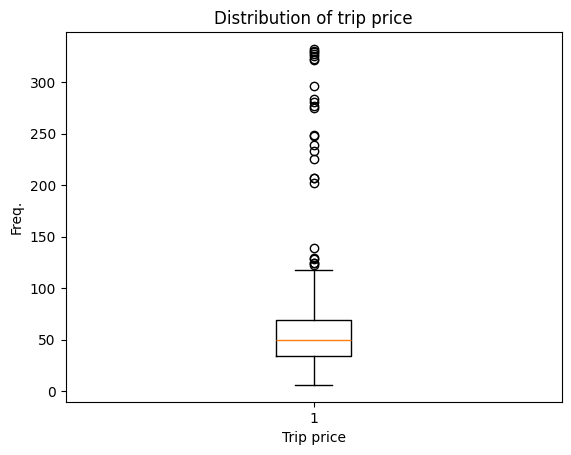

In [173]:
plt.boxplot(df["Trip_Price"])
plt.xlabel("Trip price")
plt.ylabel("Freq.")
plt.title("Distribution of trip price")


Text(0.5, 1.0, 'Distribution of trip price')

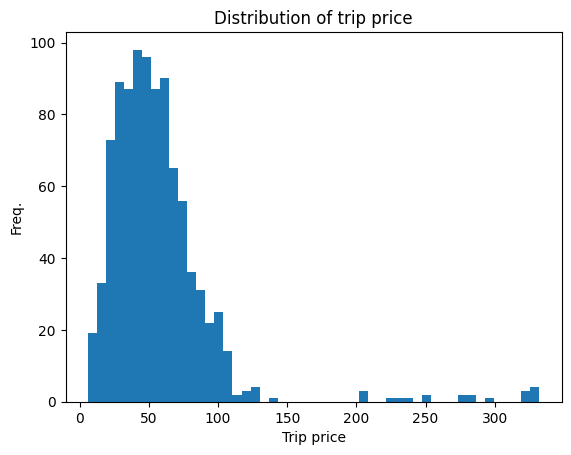

In [174]:
plt.hist(df["Trip_Price"], bins=50)
plt.xlabel("Trip price")
plt.ylabel("Freq.")
plt.title("Distribution of trip price")


tycker allt ser rimligt ut, så jag kommer inte ta bort några outliers

# Time_of_Day
- kanske ändra till strings
- 50 nulls


In [175]:
df["Time_of_Day"].info()

<class 'pandas.core.series.Series'>
Index: 951 entries, 0 to 999
Series name: Time_of_Day
Non-Null Count  Dtype 
--------------  ----- 
902 non-null    object
dtypes: object(1)
memory usage: 14.9+ KB


In [176]:
df["Time_of_Day"].isna().sum()
df["Time_of_Day"].sort_values().unique()

array(['Afternoon', 'Evening', 'Morning', 'Night', nan], dtype=object)

In [177]:
df[df["Time_of_Day"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
31,571,39.40,NaN,Weekend,2.0,Medium,Rain,2.92,1.15,0.27,91.44,72.9188
33,603,5.35,NaN,Weekday,1.0,Low,Clear,4.72,1.42,0.12,87.36,22.8002
35,686,29.01,NaN,Weekday,2.0,Low,Clear,4.36,1.39,0.20,88.77,62.4379
37,709,34.39,NaN,Weekday,4.0,Low,Clear,2.15,1.69,0.16,72.05,71.7971
18,324,47.79,NaN,Weekend,4.0,Low,Clear,2.52,0.82,0.28,106.03,71.3962
20,331,38.13,NaN,Weekday,4.0,High,Rain,3.42,0.63,0.27,52.23,41.5440
15,260,31.14,NaN,Weekend,2.0,Low,Clear,4.29,0.92,0.35,7.26,35.4798
26,451,28.36,NaN,Weekend,3.0,High,Clear,2.48,1.21,0.13,99.77,49.7657
11,170,34.20,NaN,Weekday,1.0,Low,Clear,4.55,1.02,0.41,113.92,86.1412
17,298,31.52,NaN,Weekday,1.0,Low,Clear,4.89,0.65,0.19,19.55,29.0925


In [178]:
df = df.dropna(subset=["Time_of_Day"])

# Day_of_Week
- kanske ändra till strings
- 50 nulls

In [179]:
df["Day_of_Week"].info()

<class 'pandas.core.series.Series'>
Index: 902 entries, 0 to 999
Series name: Day_of_Week
Non-Null Count  Dtype 
--------------  ----- 
857 non-null    object
dtypes: object(1)
memory usage: 14.1+ KB


In [180]:
df["Day_of_Week"].unique()
df["Day_of_Week"].isna().sum()

np.int64(45)

In [181]:
df[df["Day_of_Week"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
8,125,21.93,Afternoon,NaN,3.0,Low,NaN,4.53,0.76,NaN,74.52,48.0240
10,161,31.98,Morning,NaN,3.0,Medium,Clear,2.32,1.16,0.35,52.39,57.7533
29,710,38.25,Morning,NaN,1.0,Low,Rain,3.49,1.18,0.17,109.53,67.2451
22,398,37.79,Afternoon,NaN,1.0,Medium,Clear,4.86,0.98,0.20,13.64,44.6222
12,195,18.11,Evening,NaN,2.0,Low,Rain,2.93,1.61,0.37,74.66,59.7113
7,107,38.02,Evening,NaN,4.0,NaN,Clear,NaN,1.31,0.35,33.73,66.2817
43,905,44.74,Morning,NaN,NaN,Medium,Rain,4.67,0.83,0.18,51.82,51.1318
15,317,9.49,Evening,NaN,3.0,High,Rain,3.74,1.90,0.48,46.08,43.8894
33,749,31.59,Morning,NaN,3.0,High,NaN,2.26,1.72,0.42,40.38,73.5544
25,636,27.10,Afternoon,NaN,4.0,Medium,Clear,NaN,1.80,0.26,81.01,73.0726


In [182]:
df = df.dropna(subset=["Day_of_Week"])

# Passenger_Count
- 50 nulls
- allt annat ser bra ut, inget orimligt

In [183]:
df["Passenger_Count"].describe()

count    814.000000
mean       2.487715
std        1.105381
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Passenger_Count, dtype: float64

In [184]:
df["Passenger_Count"].info()
df["Passenger_Count"].sort_values().unique()

<class 'pandas.core.series.Series'>
Index: 857 entries, 0 to 999
Series name: Passenger_Count
Non-Null Count  Dtype  
--------------  -----  
814 non-null    float64
dtypes: float64(1)
memory usage: 13.4 KB


array([ 1.,  2.,  3.,  4., nan])

In [185]:
df["Passenger_Count"].isna().sum()

np.int64(43)

In [186]:
df[df["Passenger_Count"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
14,326,28.16,Morning,Weekend,NaN,NaN,Clear,3.91,0.80,0.48,79.78,64.7324
4,173,12.10,Morning,Weekend,NaN,Low,Clear,NaN,0.59,0.31,NaN,19.2643
37,680,41.04,Afternoon,Weekday,NaN,Medium,Clear,3.78,0.85,0.10,54.37,44.1010
18,433,5.96,Afternoon,Weekday,NaN,Low,Clear,4.96,0.69,0.23,81.77,27.8795
19,448,19.44,Night,Weekday,NaN,Low,NaN,4.04,1.82,0.47,33.26,55.0530
17,428,NaN,Afternoon,Weekday,NaN,Medium,Rain,3.84,1.55,0.41,19.20,39.9065
20,450,39.08,Afternoon,Weekday,NaN,Low,Clear,2.44,1.63,NaN,36.57,83.6940
0,33,47.50,Morning,Weekend,NaN,Low,Clear,4.39,0.51,0.30,95.55,57.2800
15,356,2.30,Night,Weekend,NaN,Low,Clear,2.43,1.44,0.26,29.64,13.4484
9,280,44.61,Afternoon,Weekday,NaN,Low,NaN,3.96,1.03,0.28,21.45,55.9143


In [187]:
df = df.dropna(subset=["Passenger_Count"])

Text(0.5, 1.0, 'Distribution of Passenger_Count')

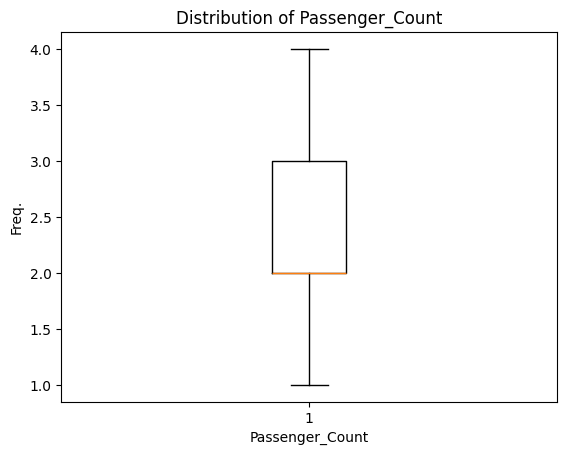

In [188]:
plt.boxplot(df["Passenger_Count"])
plt.xlabel("Passenger_Count")
plt.ylabel("Freq.")
plt.title("Distribution of Passenger_Count")


jag hade med passenger count först i mina features, men kommer ta bort den. först tänkte jag att om man har fler passagerare så kommer det bli större bil. större bil -> dyrare. men insåg efter att max passagerare är 4 st, vilket det får plats i en normalstor bil

# Traffic_Conditions
- 50 nulls

In [189]:
df["Traffic_Conditions"].info()

<class 'pandas.core.series.Series'>
Index: 814 entries, 0 to 999
Series name: Traffic_Conditions
Non-Null Count  Dtype 
--------------  ----- 
768 non-null    object
dtypes: object(1)
memory usage: 12.7+ KB


In [190]:
df["Traffic_Conditions"].isna().sum()
df["Traffic_Conditions"].unique()


array(['Low', 'High', 'Medium', nan], dtype=object)

In [191]:
df[df["Traffic_Conditions"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
34,707,40.68,Morning,Weekday,3.0,NaN,Clear,3.01,1.11,0.12,84.00,58.2448
1,10,NaN,Morning,Weekday,4.0,NaN,Clear,2.40,0.58,0.43,26.34,14.8920
26,514,3.22,Morning,Weekday,3.0,NaN,Clear,3.36,NaN,0.37,34.15,20.0527
15,309,14.27,Evening,Weekday,2.0,NaN,Rain,3.25,0.97,0.11,19.13,19.1962
23,483,31.75,Morning,Weekday,1.0,NaN,Rain,2.13,1.75,0.19,68.64,70.7341
5,131,11.88,Afternoon,Weekday,1.0,NaN,NaN,3.75,0.71,0.34,30.47,22.5446
41,857,24.13,Afternoon,Weekday,1.0,NaN,Snow,3.37,1.92,0.31,23.71,57.0497
35,718,7.09,Night,Weekend,2.0,NaN,Clear,NaN,1.91,0.22,102.35,39.1789
43,964,15.15,Afternoon,Weekend,2.0,NaN,Clear,4.43,1.06,0.50,98.52,69.7490
13,278,35.40,Morning,Weekday,3.0,NaN,Clear,4.47,1.98,0.46,93.88,117.7468


In [192]:
df = df.dropna(subset=["Traffic_Conditions"])

# Trip_Distance_km
- 50 nulls
- inga orimliga värden. det är höger snedfördelat, vilket är rimligt. det är vanligare med korta resor än långa

In [193]:
df["Trip_Distance_km"].info()

<class 'pandas.core.series.Series'>
Index: 768 entries, 0 to 999
Series name: Trip_Distance_km
Non-Null Count  Dtype  
--------------  -----  
727 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [194]:
df["Trip_Distance_km"].describe()

count    727.000000
mean      27.564619
std       20.569374
min        1.270000
25%       12.880000
50%       26.030000
75%       38.815000
max      146.067047
Name: Trip_Distance_km, dtype: float64

In [195]:
df[df["Trip_Distance_km"].isna()].reset_index().sample(15)

,index,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
27,734,NaN,Morning,Weekend,1.0,Low,Clear,3.14,NaN,0.14,89.47,34.4316
2,95,NaN,Morning,Weekend,1.0,Medium,Clear,3.43,0.91,0.50,67.43,60.0770
22,470,NaN,Afternoon,Weekday,3.0,High,Clear,4.37,0.80,0.49,18.39,14.6611
14,357,NaN,Afternoon,Weekday,3.0,Medium,Rain,2.03,0.91,0.19,12.42,31.4168
31,822,NaN,Afternoon,Weekday,1.0,Medium,Clear,3.64,1.22,0.18,75.87,38.4514
38,961,NaN,Afternoon,Weekday,2.0,Medium,Clear,4.06,1.05,0.46,7.26,39.4771
6,166,NaN,Evening,Weekday,2.0,High,Clear,4.11,1.00,0.36,86.31,51.9016
37,943,NaN,Evening,Weekend,1.0,Low,Snow,2.10,1.47,0.27,48.69,76.4865
21,446,NaN,Afternoon,Weekday,1.0,Medium,Clear,3.02,0.70,0.35,94.88,70.7450
32,830,NaN,Night,Weekday,3.0,Low,Clear,2.11,0.82,0.40,85.00,45.9582


In [196]:
df["Trip_Distance_km"].sort_values().unique()

array([  1.27      ,   1.45      ,   1.54      ,   1.56      ,
         1.64      ,   1.71      ,   1.81      ,   1.89      ,
         1.9       ,   1.97      ,   2.1       ,   2.14      ,
         2.19      ,   2.24      ,   2.25      ,   2.29      ,
         2.3       ,   2.33      ,   2.53      ,   2.64      ,
         2.69      ,   2.79      ,   2.8       ,   2.81      ,
         2.83      ,   2.93      ,   3.        ,   3.11      ,
         3.22      ,   3.23      ,   3.25      ,   3.28      ,
         3.3       ,   3.52      ,   3.53      ,   3.54      ,
         3.68      ,   3.85      ,   4.11      ,   4.22      ,
         4.4       ,   4.46      ,   4.49      ,   4.65      ,
         4.68      ,   4.81      ,   4.93      ,   5.01      ,
         5.06      ,   5.12      ,   5.16      ,   5.18      ,
         5.19      ,   5.26      ,   5.42      ,   5.47      ,
         5.49      ,   5.56      ,   5.59      ,   5.63      ,
         5.76      ,   5.79      ,   5.87      ,   5.94

In [197]:
df = df.dropna(subset=["Trip_Distance_km"])

Text(0.5, 1.0, 'Distribution of trip distance')

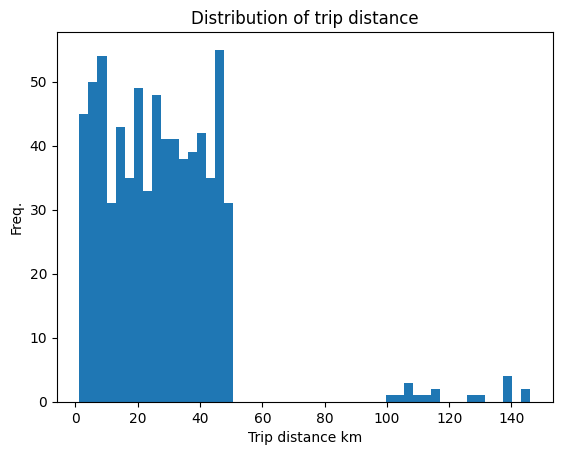

In [198]:
plt.hist(df["Trip_Distance_km"], bins=50)
plt.xlabel("Trip distance km")
plt.ylabel("Freq.")
plt.title("Distribution of trip distance")

Text(0.5, 1.0, 'Trip distance vs trip price')

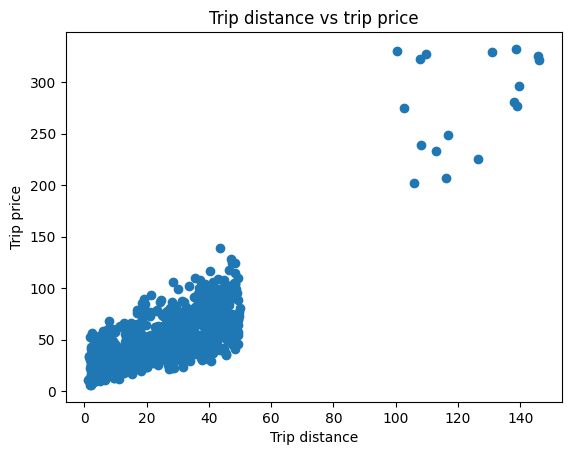

In [199]:
plt.scatter(df["Trip_Distance_km"], df["Trip_Price"])
plt.xlabel("Trip distance")
plt.ylabel("Trip price")
plt.title("Trip distance vs trip price")

spridningen ökar desto längre resor det blir, så en mer koplex modell behövs

# NULLS
- då det är som mest 50 nulls i kolumnerna kommer jag kasta dem, då jag tycker det är för få för att göra något med

In [200]:
colums_to_use = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions", "Trip_Distance_km", "Trip_Price"]
df[colums_to_use].reset_index().isna().sum()

index                 0
Time_of_Day           0
Day_of_Week           0
Traffic_Conditions    0
Trip_Distance_km      0
Trip_Price            0
dtype: int64

## Object -> strings
- jag gör de features som är objects till strings, för att få en tydlig och konsekvent strängtyp

In [201]:
cols = ["Time_of_Day", "Day_of_Week", "Traffic_Conditions"]
df[cols] = df[cols].astype("string")

# Cleaned dataset
- efter lite mer sökande insåg jag att passenger count inte behövs. den blir överflödig då inte det påverkar slutpriset

In [202]:
features = [
    "Time_of_Day",
    "Day_of_Week",
    "Traffic_Conditions",
    "Trip_Distance_km"
]

label = "Trip_Price"

In [203]:
df_clean = df[features + [label]].copy()

In [204]:
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time_of_Day         727 non-null    string 
 1   Day_of_Week         727 non-null    string 
 2   Traffic_Conditions  727 non-null    string 
 3   Trip_Distance_km    727 non-null    float64
 4   Trip_Price          727 non-null    float64
dtypes: float64(2), string(3)
memory usage: 34.1 KB


,Time_of_Day,Day_of_Week,Traffic_Conditions,Trip_Distance_km,Trip_Price
0,Morning,Weekday,Low,19.35,36.2624
2,Evening,Weekend,High,36.87,52.9032
3,Evening,Weekday,Low,30.33,36.4698
5,Afternoon,Weekend,Medium,8.64,60.2028
6,Afternoon,Weekday,High,3.85,11.2645


In [205]:
df_clean.to_csv("../data/clean_taxi_data.csv", index=False)

In [206]:
df_clean

,Time_of_Day,Day_of_Week,Traffic_Conditions,Trip_Distance_km,Trip_Price
0,Morning,Weekday,Low,19.35,36.2624
2,Evening,Weekend,High,36.87,52.9032
3,Evening,Weekday,Low,30.33,36.4698
5,Afternoon,Weekend,Medium,8.64,60.2028
6,Afternoon,Weekday,High,3.85,11.2645
...,...,...,...,...,...
995,Afternoon,Weekend,Medium,5.49,34.4049
996,Night,Weekday,Medium,45.95,62.1295
997,Morning,Weekday,Low,7.70,33.1236
998,Morning,Weekday,Low,47.56,61.2090


In [207]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 727 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time_of_Day         727 non-null    string 
 1   Day_of_Week         727 non-null    string 
 2   Traffic_Conditions  727 non-null    string 
 3   Trip_Distance_km    727 non-null    float64
 4   Trip_Price          727 non-null    float64
dtypes: float64(2), string(3)
memory usage: 34.1 KB


In [208]:
df_clean["Trip_Distance_km"].min(), df_clean["Trip_Distance_km"].max()

(np.float64(1.27), np.float64(146.0670471598387))

In [209]:
df_clean["Trip_Price"].describe()

count    727.000000
mean      57.749706
std       42.396335
min        6.126900
25%       34.365350
50%       50.696000
75%       69.099350
max      332.043689
Name: Trip_Price, dtype: float64

In [210]:
df_clean["Time_of_Day"].unique()

<StringArray>
['Morning', 'Evening', 'Afternoon', 'Night']
Length: 4, dtype: string